# Модуль 1. Объектно-Ориентированное Программирование
## Объектно-Ориентированный Дизайн

### SOLID принципы
- #### Single Responsibility Principle
- #### Opened/Closed Principle
- #### Liscov's Substitution Principle
- #### Interface Segregation Principle
- #### Dependency Inversion Principle

### Single Responsibility Principle
#### Принцип единственной обязанности
- ##### There should never be more than one reason for a class to change
- ##### A class should have one and only one responsibility

<center>![solid-1-1.jpg](attachment:solid-1-1.jpg)</center>

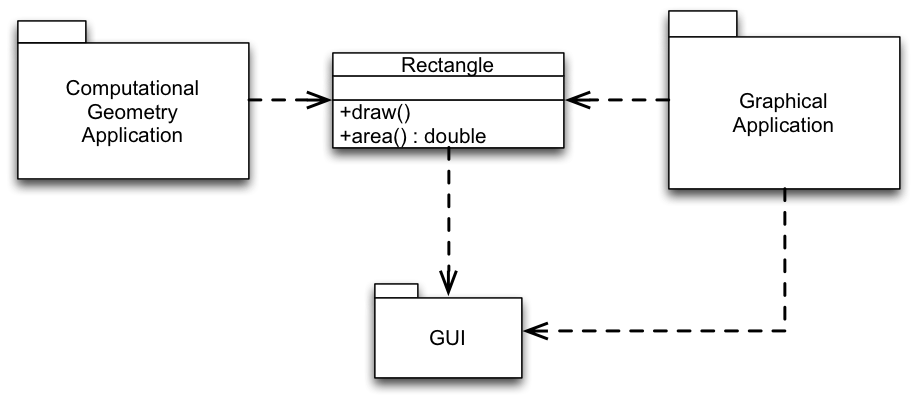

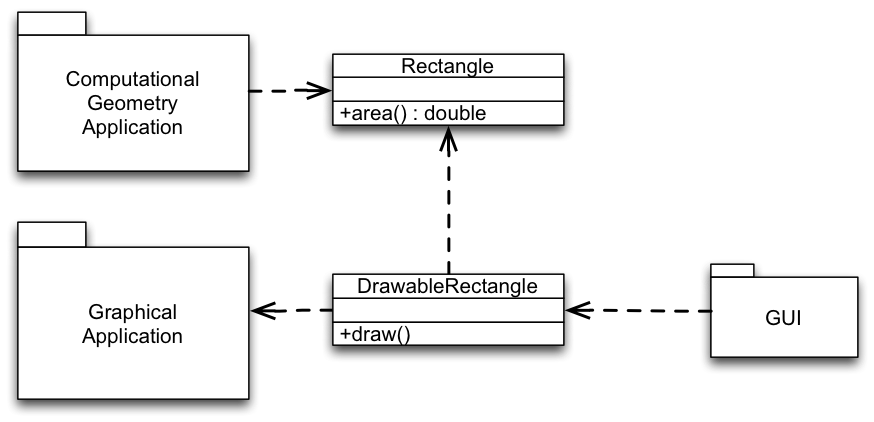

### Open/Closed Principle
#### Принцип открытости/закрытости
- ##### Software entities (classes, modules, functions, etc.) should be open for extension, but closed for modification

### [ Клиент ] ---- [ Сервер ]

### [ Клиент ] ---- [ Абстрактный Сервер ] <---- [ Сервер ]

### Абстракция - ключ к хорошему дизайну

### Абстрактный класс и абстрактный метод

In [ ]:
import abc

class АбстрактныйКласс(abc.ABC):
    
    @abc.abstractmethod
    def абстрактный_метод(self):
        pass


In [ ]:
class КонкретныйКласс(АбстрактныйКласс):
    pass

объект = КонкретныйКласс() # Ошибка!


In [ ]:
class КонкретныйКласс(АбстрактныйКласс):
    
    def абстрактный_метод(self):
        pass

объект = КонкретныйКласс()


### Liskov's Substitution Principle
#### Принцип подстановки Барбары Лисков
- ##### Subtypes must be substitutable for their base types
- ##### Functions that use references to base classes must be able to use objects of derived classes without knowing it

##### наследование == 'is a'
##### Администратор - это СуперПользователь?
##### class Администратор(СуперПользователь)

In [ ]:
class Птица:
    def лети(self):
      print("Полетели")


In [ ]:
def полетаем(птица):
    if isinstance(птица, Птица):
        птица.лети()
        

In [ ]:
class Сокол(Птица): pass


In [ ]:
сокол = Сокол()
полетаем(сокол)


In [ ]:
class Страус(Птица): pass


In [ ]:
страус = Страус()
полетаем(страус)


### Опасности:
- #### Предусловия могут быть усилены в подклассе
- #### Постусловия могут быть ослаблены в подклассе

In [ ]:
class Птица:
    def лети(self):
        print("Полетели") 
        return 'сколько-то километров'
    

In [ ]:
def полетаем(птица):
    if isinstance(птица, Птица):
        расстояние = птица.лети() 
        print(расстояние)
            

In [ ]:
class Сокол(Птица):
    def лети(self, x): # !!!
        print("Полетели")
        # !!!
        

### The Interface Segregation Principle
#### Принцип разделения интерфейса
- #### Clients should not be forced to depend upon interfaces that they do not use

In [ ]:
import abc

class ИнтерфейсПтицы(abc.ABC):
    
    @abc.abstractmethod
    def ешь(self):
        pass
    
    @abc.abstractmethod
    def иди(self):
        pass
    
    @abc.abstractmethod
    def чирикай(self):
        pass
    
    @abc.abstractmethod
    def лети(self):
         pass 
        

In [ ]:
import abc

class ИнтерфейсПтицы(abc.ABC):
    
    @abc.abstractmethod
    def ешь(self):
        pass
    # Другие абстрактные методы
    
class ИнтерфейсЛетающейПтицы(ИнтерфейсПтицы):
    @abc.abstractmethod
    def лети(self):
         pass
        

In [ ]:
def полетаем(птица):
    if isinstance(птица, ИнтерфейсЛетающейПтицы):
        расстояние = птица.лети() 
        print(расстояние)
            

In [ ]:
class Сокол(ИнтерфейсЛетающейПтицы):
    def ешь(self):
        print("Поел") 
    # Реализация остальных методов    
    def лети(self):
        print("Полетели")
        
class Страус(ИнтерфейсПтицы):
    def ешь(self):
        print("Поел")
    # Реализация остальных методов
            

### Dependency inversion principle
#### Принцип инверсии зависимостей
- ##### High-level modules should not depend on low-level modules
 - ##### Both should depend on abstractions
- ##### Abstractions should not depend on details
 - ##### Details should depend on abstractions

In [ ]:
class FileRead:
    def __init__(self, name):
        self._name = name
    def read(self):
        print(f'Читаем из файла {self._name}')
        return 'Прочитали из файла'

class KeyboardRead:
    def readln(self):
        print('Читаем с клавиатуры')
        return 'Прочитали ввод с клавиатуры'

class SendMessage:
    def send(self, msg):
        print(f'Послали сообщение: {msg}')

In [ ]:
class Processing:
    def __init__(self, read, send): 
        if not isinstance(read, FileRead):
            raise TypeError('Ошибка при чтении из файла')
        if not isinstance(send, SendMessage):
            raise TypeError('Ошибка при отправке сообщения')
        self._reader = read 
        self._sender = send 
  
    def process(self):
        msg = self._reader.read()
        self._sender.send(msg)

In [ ]:
f = FileRead("file.txt")
s = SendMessage()
p = Processing(f, s)
p.process()

In [ ]:
import abc
class IReader(abc.ABC):
    @abc.abstractmethod
    def read(self):
        pass

class IWriter(abc.ABC):
    @abc.abstractmethod
    def write(self, msg):
        pass


In [ ]:
class InputKeyboard(IReader):
    def read(self):
        return 'Прочитали ввод с клавиатуры'

class OutputNetwork(IWriter):
    def write(self, msg):
        print(f"Послали сообщение {msg} по сети")


In [ ]:
class Processing:
    def __init__(self, input, output): 
        if not isinstance(input, IReader):
            raise TypeError('Ошибка при чтении данных')
        if not isinstance(out, IWriter):
            raise TypeError('Ошибка при записи данных')
        self._input = input 
        self._output = output 
  
    def process(self):
        msg = self._input.read()
        self._output.write(msg)
        

In [ ]:
kbd = InputKeyboard()
net = OutputNetwork()
proc = Processing(kbd, net)
proc.process()

### Шаблоны проектирования

```python
class Pizza:
    def __init__(self, size, cheese, pepperoni, bacon): 
        self.__size = size
        self.__cheese = cheese
        self.__pepperoni = pepperoni
        self.__bacon = bacon

    def show(self):
        recipe = 'Пицца ' + str(self.__size) + " с "
        recipe += "сыром, " if self.__cheese else ""
        recipe += "пепперони, " if self.__pepperoni else ""
        recipe += "беконом" if self.__bacon else ""
        return recipe
```

```python
pizza = Pizza(12, True, False, True)
```

```python
pizza = PizzaMaker(12)\
   .cheese()\
   .pepperoni()\
   .bacon()\
   .make()
order = Pizza(pizza)
```

### Шаблон проектирования Builder

In [ ]:
class PizzaMaker:
    def __init__(self, size):
        self._size = size
        self._cheese = False
        self._pepperoni = False
        self._bacon  = False
    def cheese(self):
        self._cheese = True; return self
    def pepperoni(self):
        self._pepperoni = True; return self
    def bacon(self):
        self._bacon = True; return self
    def make(self): return self
    

In [ ]:
class Pizza:
    def __init__(self, maker: PizzaMaker):
        self.__size = maker._size
        self.__cheese = maker._cheese
        self.__pepperoni = maker._pepperoni
        self.__bacon = maker._bacon
    def show(self):
        recipe = 'Пицца ' + str(self.__size) + " с "
        recipe += "сыром, " if self.__cheese else ""
        recipe += "пепперони, " if self.__pepperoni else ""
        recipe += "беконом" if self.__bacon else ""
        return recipe
    

In [ ]:
pizza = PizzaMaker(12).cheese().bacon().make()
order = Pizza(pizza)
print(order.show())


### Взаимосвязи классов
#### Наследование
#### Реализация
#### Ассоциация
- ##### Агрегация
- ##### Композиция

In [ ]:
class A()
    def fn(self): pass
    

In [ ]:
# Наследование и реализация
class B(A): 
    pass

b = B(); 
b.fn()


In [ ]:
# Агрегация
class C:
    def __init__(self, obj):
        self.obj = obj
    def call_fn(self):
        self.obj.fn()
a = A()
c = C(a)
c.call_fn()


In [ ]:
# Композиция
class D:
    def __init__(self):
        self.obj = A()
    def call_fn(self):
        self.obj.fn()
d = D()
d.call_fn()


# Выводы
#### Объектно-ориентированное программирование — методология программирования, основанная на представлении программы в виде совокупности объектов, каждый из которых является экземпляром определенного класса, а классы образуют иерархию наследования
#### Основные принципы ООП: инкапсуляция, наследование и полиморфизм
#### Объектно-ориентированный дизайн — методология определения поведения классов/объектов и их взаимодействия для решения какой-либо задачи
#### Хороший ООД приложения позволяет при необходимости вносить изменения с минимальными затратами и расширять его без изменения существующего кода